# Implementing Bernstein-Vazirani Algorithm

## Importing Libraries

In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit import Aer, execute
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

## Creating Quantum Oracle

In [2]:
def bv_oracle(n):
    oracle_qc = QuantumCircuit(n+1)
    s = np.random.randint(2**n)
    s_str = format(s, '0'+str(n)+'b')
    for i in range(len(s_str)):
        if s_str[i] == '1':
            oracle_qc.cx(i,n)
    s_str = s_str[::-1]
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = 'Oracle'
    print(s_str)
    return oracle_gate

## Bernstein-Vazirani Algorithm

In [3]:
def bv_algo(n,oracle):
    algo_qc = QuantumCircuit(n+1,n)
    algo_qc.x(n)
    algo_qc.h(n)
    for i in range(n):
        algo_qc.h(i)
    algo_qc.append(oracle,range(n+1))
    for i in range(n):
        algo_qc.h(i)
    for i in range(n):
        algo_qc.measure(i,i)
    return algo_qc

## Executing the algorithm

10001


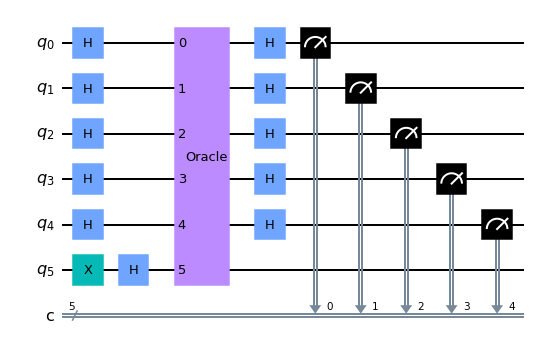

In [7]:
n = 5
oracle = bv_oracle(5)
qc = bv_algo(n,oracle)
qc.draw('mpl')

## Getting output through the simulator

In [8]:
job = execute(qc, backend=QasmSimulator(), shots=1024)
results = job.result()
counts = results.get_counts()

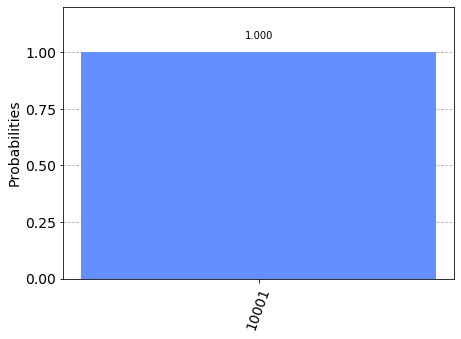

In [9]:
plot_histogram(counts)